In [29]:
import os
import logging
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydicom import dcmread
from utils import display_dicom_file
import preprocessing

In [30]:
import sys
print(sys.executable)

C:\Users\Shevy Korzen\.conda\envs\viz\python.exe


In [31]:
METADATA_PATH = './nbia_metadata.pkl'
df = pd.read_pickle(METADATA_PATH)

In [32]:
df.head()

,PatientID,PatientSex,StudyDescription,SeriesDescription,Study Instance UID,Series Instance UID,Acquisition Number,Instance Number,Modality,StudyDate,Rows,Columns,SliceLocation,Path
0,0522c0001,F,Neck^HeadNeckPETCT,CT 5.0 H30s,1.3.6.1.4.1.14519.5.2.1.5099.8010.199920086920...,1.3.6.1.4.1.14519.5.2.1.5099.8010.427264300850...,2.0,1,CT,19990823,512,512,-552.0,../data/nbia_data\manifest-1641110310923\Head-...
1,0522c0001,F,Neck^HeadNeckPETCT,CT 5.0 H30s,1.3.6.1.4.1.14519.5.2.1.5099.8010.199920086920...,1.3.6.1.4.1.14519.5.2.1.5099.8010.427264300850...,2.0,2,CT,19990823,512,512,-549.6,../data/nbia_data\manifest-1641110310923\Head-...
2,0522c0001,F,Neck^HeadNeckPETCT,CT 5.0 H30s,1.3.6.1.4.1.14519.5.2.1.5099.8010.199920086920...,1.3.6.1.4.1.14519.5.2.1.5099.8010.427264300850...,2.0,3,CT,19990823,512,512,-547.2,../data/nbia_data\manifest-1641110310923\Head-...
3,0522c0001,F,Neck^HeadNeckPETCT,CT 5.0 H30s,1.3.6.1.4.1.14519.5.2.1.5099.8010.199920086920...,1.3.6.1.4.1.14519.5.2.1.5099.8010.427264300850...,2.0,4,CT,19990823,512,512,-544.8,../data/nbia_data\manifest-1641110310923\Head-...
4,0522c0001,F,Neck^HeadNeckPETCT,CT 5.0 H30s,1.3.6.1.4.1.14519.5.2.1.5099.8010.199920086920...,1.3.6.1.4.1.14519.5.2.1.5099.8010.427264300850...,2.0,5,CT,19990823,512,512,-542.4,../data/nbia_data\manifest-1641110310923\Head-...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9331 entries, 0 to 9330
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            9331 non-null   object 
 1   PatientSex           7967 non-null   object 
 2   StudyDescription     7967 non-null   object 
 3   SeriesDescription    9331 non-null   object 
 4   Study Instance UID   9331 non-null   object 
 5   Series Instance UID  9331 non-null   object 
 6   Acquisition Number   6775 non-null   float64
 7   Instance Number      9331 non-null   int64  
 8   Modality             9331 non-null   object 
 9   StudyDate            9331 non-null   object 
 10  Rows                 9331 non-null   int64  
 11  Columns              9331 non-null   int64  
 12  SliceLocation        8877 non-null   float64
 13  Path                 9331 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1020.7+ KB


In [35]:
# Drop files without Series Description
df = df.dropna(subset=['StudyDescription']).reset_index()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7967 entries, 0 to 7966
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                7967 non-null   int64  
 1   PatientID            7967 non-null   object 
 2   PatientSex           7967 non-null   object 
 3   StudyDescription     7967 non-null   object 
 4   SeriesDescription    7967 non-null   object 
 5   Study Instance UID   7967 non-null   object 
 6   Series Instance UID  7967 non-null   object 
 7   Acquisition Number   6775 non-null   float64
 8   Instance Number      7967 non-null   int64  
 9   Modality             7967 non-null   object 
 10  StudyDate            7967 non-null   object 
 11  Rows                 7967 non-null   int64  
 12  Columns              7967 non-null   int64  
 13  SliceLocation        7513 non-null   float64
 14  Path                 7967 non-null   object 
dtypes: float64(2), int64(4), object(9)
mem

In [37]:
df.StudyDescription.value_counts().sort_index()

Abdomen^AbdomenPETCT            4040
HEAD & NECK  (PET/CT)            696
HEAD & NECK (IMRT)               175
Neck^HeadNeckPETCT              1017
PET HEAD/NECK                    133
PET HEAD/NECK WB                 188
PET/CT HEAD & NECK CA            632
PET/CT HEAD&NECK CA IN           632
PET^1PETCT_HEADNECK (Adult)      224
PET^1PETCT_WholeBody (Adult)     230
Name: StudyDescription, dtype: int64

In [38]:
df.PatientID.nunique()

10

In [39]:
# Drop Whole Body scans
df = df[df.StudyDescription != 'PET^1PETCT_WholeBody (Adult)'].reset_index()
df.StudyDescription.value_counts().sort_index()

Abdomen^AbdomenPETCT           4040
HEAD & NECK  (PET/CT)           696
HEAD & NECK (IMRT)              175
Neck^HeadNeckPETCT             1017
PET HEAD/NECK                   133
PET HEAD/NECK WB                188
PET/CT HEAD & NECK CA           632
PET/CT HEAD&NECK CA IN          632
PET^1PETCT_HEADNECK (Adult)     224
Name: StudyDescription, dtype: int64

In [40]:
df.PatientID.value_counts()

0522c0009    1325
0522c0002    1034
0522c0003    1034
0522c0013    1034
0522c0027     871
0522c0015     632
0522c0017     632
0522c0001     630
0522c0014     321
0522c0012     224
Name: PatientID, dtype: int64

In [41]:
df.groupby(['StudyDescription']).PatientID.nunique()

StudyDescription
Abdomen^AbdomenPETCT           5
HEAD & NECK  (PET/CT)          1
HEAD & NECK (IMRT)             1
Neck^HeadNeckPETCT             5
PET HEAD/NECK                  1
PET HEAD/NECK WB               1
PET/CT HEAD & NECK CA          2
PET/CT HEAD&NECK CA IN         2
PET^1PETCT_HEADNECK (Adult)    1
Name: PatientID, dtype: int64

In [42]:
df.Modality.value_counts()

CT    7737
Name: Modality, dtype: int64

In [68]:
MODALITIES = ['CT', 'CTA', 'CTP', 'NCCT', 'PET']
REGION_DICT = {'Head': 'Brain',
                'Brain': 'Brain',
                'Chest': 'Chest',
                'Abdomen': 'Abdomen'}

In [69]:
def get_modalities_from_labels(labels, modalities):
    modality_type = pd.DataFrame(['CT']*len(labels))
    for modality in modalities:
        modality_type[labels.str.contains(modality, case=False)] = modality
    return modality_type

modality_type = get_modalities_from_labels(df.StudyDescription, MODALITIES)
modality_type.value_counts()

PET    7562
CT      175
dtype: int64

In [71]:
def get_body_region_from_labels(labels, region_dict):
    body_region = pd.DataFrame(['np.nan']*len(labels))
    for key, value in region_dict.items():
        body_region[labels.str.contains(key, case=False)] = value
    return body_region

body_region = get_body_region_from_labels(df.StudyDescription, REGION_DICT)
body_region.value_counts()

Abdomen    4040
Brain      3697
dtype: int64

PET    7562
CT      175
dtype: int64

PatientID: 0522c0002
PatientSex: M
StudyDescription: Abdomen^AbdomenPETCT
SeriesDescription: AbdomenCT 5.0 B40s
Study Instance UID: 1.3.6.1.4.1.14519.5.2.1.5099.8010.217836670708542506360829799868
Series Instance UID: 1.3.6.1.4.1.14519.5.2.1.5099.8010.251402186443276877513851675309
Acquisition Number: 2
Instance Number: 363
Modality: CT
StudyDate: 19990825
Rows: 512
Columns: 512
SliceLocation: -1115.8
Path: ../data/nbia_data\manifest-1641110310923\Head-Neck Cetuximab\0522c0002\08-25-1999-NA-AbdomenAbdomenPETCT-99868\2.000000-AbdomenCT 5.0 B40s-75309\1-363.dcm


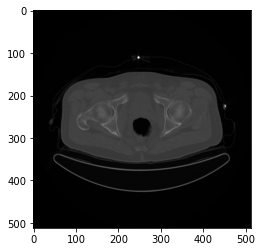

In [ ]:
n = 1
for path in df['Path'].sample(n):
   display_dicom_file(path) 

In [ ]:
ds = dcmread(path)
image = ds.pixel_array
image.shape

(512, 512)

(array([1.90917e+05, 3.44500e+03, 6.11740e+04, 6.07600e+03, 4.87000e+02,
        1.70000e+01, 8.00000e+00, 2.00000e+00, 2.00000e+00, 1.60000e+01]),
 array([   0. ,  409.5,  819. , 1228.5, 1638. , 2047.5, 2457. , 2866.5,
        3276. , 3685.5, 4095. ]),
 <BarContainer object of 10 artists>)

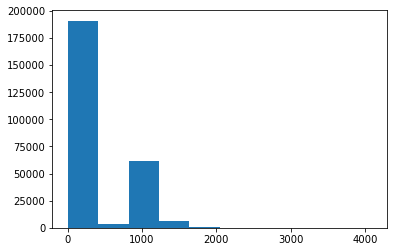

In [ ]:
plt.hist(image.ravel())

(array([1.90917e+05, 3.44500e+03, 6.11740e+04, 6.07600e+03, 4.87000e+02,
        1.70000e+01, 8.00000e+00, 2.00000e+00, 2.00000e+00, 1.60000e+01]),
 array([-1024. ,  -614.5,  -205. ,   204.5,   614. ,  1023.5,  1433. ,
         1842.5,  2252. ,  2661.5,  3071. ]),
 <BarContainer object of 10 artists>)

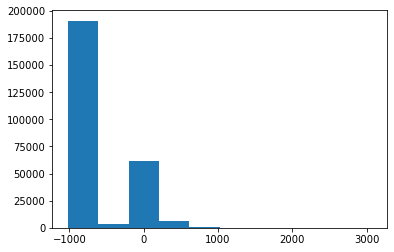

In [ ]:
image = preprocessing.rescale_hu(ds.pixel_array, ds.RescaleSlope, ds.RescaleIntercept)
plt.hist(image.ravel())

(array([2.55371e+05, 4.69000e+03, 1.50400e+03, 4.17000e+02, 1.08000e+02,
        2.30000e+01, 1.00000e+00, 6.00000e+00, 4.00000e+00, 2.00000e+01]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

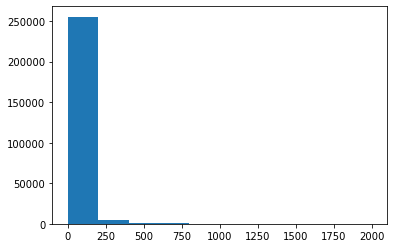

In [ ]:
image = preprocessing.clip_hu(image)
plt.hist(image.ravel())

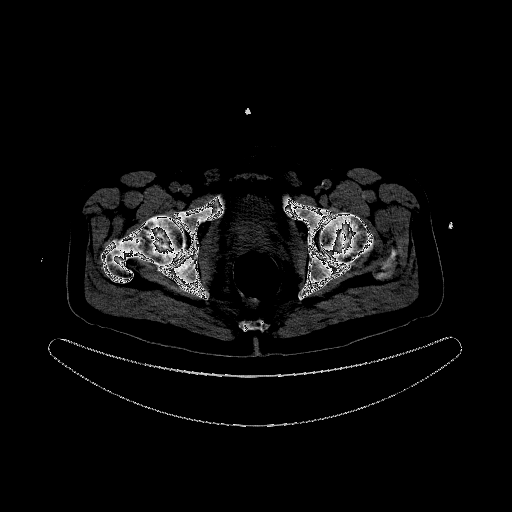

In [ ]:
from PIL import Image
PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
PIL_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


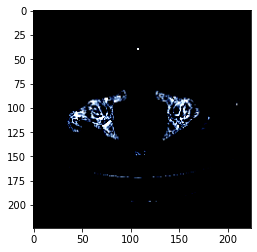

In [ ]:
image = preprocessing.torchvision_transforms(image)
plt.imshow(image.permute(1, 2, 0))

PatientID: 0522c0002
PatientSex: M
StudyDescription: Abdomen^AbdomenPETCT
SeriesDescription: AbdomenCT 5.0 B40s
Study Instance UID: 1.3.6.1.4.1.14519.5.2.1.5099.8010.217836670708542506360829799868
Series Instance UID: 1.3.6.1.4.1.14519.5.2.1.5099.8010.251402186443276877513851675309
Acquisition Number: 2
Instance Number: 363
Modality: CT
StudyDate: 19990825
Rows: 512
Columns: 512
SliceLocation: -1115.8
Path: ../data/nbia_data\manifest-1641110310923\Head-Neck Cetuximab\0522c0002\08-25-1999-NA-AbdomenAbdomenPETCT-99868\2.000000-AbdomenCT 5.0 B40s-75309\1-363.dcm


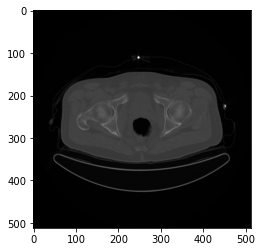

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


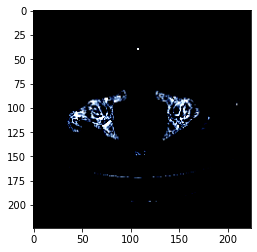

In [ ]:
display_dicom_file(path)
transformed_image = preprocessing.get_transformed_image(path)
plt.imshow(transformed_image.permute(1, 2, 0))